In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Frist let's load the cleaned up dataset
url = "https://raw.githubusercontent.com/sanjanabansal1994/Early-Stage-Diabetes-Risk-Prediction/mehrdadmalekmo/modeling/data/processed.csv"
dataset = pd.read_csv(url)
dataset.head()

,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class,age_group__34,age_group_35_49,age_group_50_64,age_group_65_
0,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1,0,1,0,0
1,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0
2,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1,0,1,0,0
3,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1,0,1,0,0
4,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,0,0,1,0


In [4]:
# Define X (features) and Y (target)
X = dataset.drop('class', axis=1)
y = dataset['class']

In [5]:
# Split the data into training and tesing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=63)

In [6]:
# Create a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=63)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.9807692307692307
Confusion Matrix:
 [[40  1]
 [ 1 62]]


In [7]:
# What about other metrics?
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        41
           1       0.98      0.98      0.98        63

    accuracy                           0.98       104
   macro avg       0.98      0.98      0.98       104
weighted avg       0.98      0.98      0.98       104



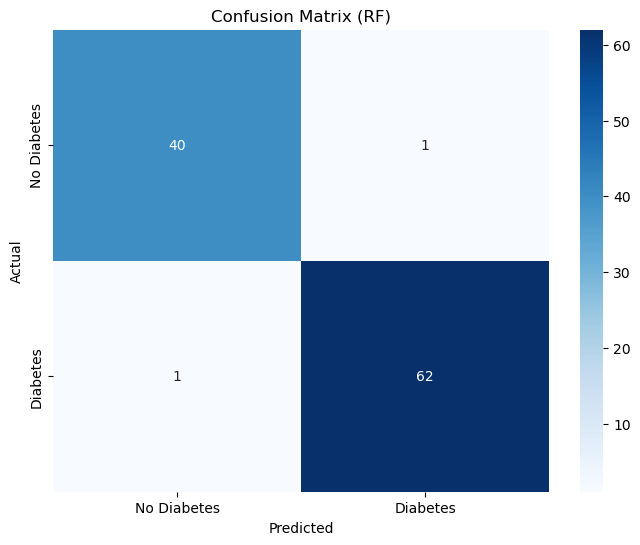

In [8]:
# PLot the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (RF)')
plt.show()

In [9]:
# Extract feature importance
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

               Feature  Importance
1             polyuria    0.221035
2           polydipsia    0.190477
0               gender    0.105930
3   sudden_weight_loss    0.056505
13            alopecia    0.049794
11     partial_paresis    0.049585
9         irritability    0.048946
10     delayed_healing    0.036369
8              itching    0.030539
5           polyphagia    0.028912
6       genital_thrush    0.025418
7      visual_blurring    0.025132
4             weakness    0.024459
12    muscle_stiffness    0.022987
14             obesity    0.021266
16     age_group_35_49    0.017160
18       age_group_65_    0.015825
17     age_group_50_64    0.015693
15       age_group__34    0.013969


Higher values indicate more important features.